<a href="https://colab.research.google.com/github/kpunsalan8/DS-3001-Final-Project/blob/main/DS_3001_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS 3001 Final Project: Assessing Stroke Risk

## Part 1: Written Analysis

**1. What is in your data?**

https://www.kaggle.com/datasets/mahatiratusher/stroke-risk-prediction-dataset
Our dataset examines key risk factors that contribute to a person’s likelihood of experiencing a stroke. The studied variables include chest pain, shortness of breath, irregular heartbeat, fatigue, dizziness, swelling (edema), pain in the neck/jaw/shoulder/back, excessive sweating, persistent cough, and nausea/vomiting. These factors were selected through analysis of leading medical authorities such as the American Stroke Association, Mayo Clinic, Cleveland Clinic, Harrison’s Principles of Internal Medicine, Stroke Prevention, Treatment, and Rehabilitation, The Stroke Book, and the World Health Organization. Each of the 7000 records represents an individual’s medical symptoms and risk assessment, with binary indicators (1 = symptom present, 0 = symptom absent). Age is also included as a critical factor, given that an increase in age is strongly associated with a heightened risk of stroke.



**2. How will these data be useful for studying the phenomenon you're interested in?**

According to UTMB health, stroke is the fifth leading cause of death for US citizens, and is a prominent cause of long-term disability [1]. Since stroke is such a prevalent cause of health issues in the US, the phenomenon we are interested in is calculating the risk of stroke based on the presence or absence of the following symptoms: chest pain, shortness of breath, irregular heartbeat, fatigue and weakness, dizziness, swelling (edema), pain in neck/shoulder/back, excessive sweating, persistent cough, nausea/vomiting, high blood pressure, chest discomfort (activity), cold hands/feet, snoring/sleep apnea, anxiety/feeling of doom, and age. Stroke symptoms are often overlooked or attributed to other health issues, leading to delayed diagnosis, inadequate preventative measures, and increased risk of severe complications or fatal outcomes [2]. According to the CDC, stroke prevalence has increased by 15.7% for adults aged 45 to 64 and 14.6% for adults aged 18 to 44 from 2011 to 2023 [3]. As the age of onset for strokes is becoming younger and younger over time, this study becomes increasingly relevant to American health. This dataset will be useful for examining the risk of stroke by age group, the risk factors that are majorly present in the American population, and the correlation between each risk factor and the overall risk of stroke, which enables us to determine which risk factor is most correlated with incidence of stroke. Through this analysis, we hope to identify a better way to quantify the risk of stroke, enhance our understanding of its causes, and perhaps provide insight into ways we can better combat it.



**3. What are the challenges you've resolved or expect to face in using them?**

There are several challenges that we have resolved when cleaning our data. All the variables initially presented as “0,1.” First, we changed that to “Y,N” in order to more easily interpret our variables (as the “0,1” represented “Y,N”). This will make it easier to analyze our data in the future. Next, we needed to ensure that the code was able to create a “count” for the binary variables, so that we are able to perform analysis such as calculating percentages of the symptoms likelihood to impact having a stroke.
We anticipate several future challenges. First, we may need to alter the “age” variable when creating visualizations and descriptions, as it is currently an integer (float variable), while all other variables are binary variables. We may need to change the “age” variable to a string if needed. Second, we anticipate that several of the variables will overlap. For example, the variable “anxiety and feeling of doom” may closely relate to the variable “increased heart rate” or “high blood pressure,” as anxiety causes tension, sweating, increased blood pressure, and increased heart rate. During our analysis, it may be difficult to discern which variables independently contribute to increasing the likelihood of having a stroke.

#### References

* [1]: https://www.utmbhealth.com/services/neurology/procedures-conditions/stroke/stroke-facts

* [2:] https://www.penningtonslaw.com/news-publications/latest-news/2023/the-consequences-of-a-delayed-or-missed-diagnosis-of-a-stroke#:~:text=If%20there%20is%20a%20delay,speech%2C%20mobility%20and%20personality%20changes.

* [3]: https://healthmatters.nyp.org/what-to-know-about-the-rising-stroke-rates-in-younger-people/#:~:text=The%20rates%20of%20stroke%20are,Joshua%20Willey

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load in data
df = pd.read_csv('https://raw.githubusercontent.com/kpunsalan8/DS-3001-Final-Project/refs/heads/main/stroke_risk_dataset.csv',low_memory=False)

In [ ]:
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


## **Data cleaning**

In [ ]:
df['Chest Pain'] = df['Chest Pain'].map({0: 'N', 1: 'Y'})
print(df['Chest Pain'])

0        N
1        N
2        Y
3        Y
4        N
        ..
69995    Y
69996    N
69997    Y
69998    N
69999    N
Name: Chest Pain, Length: 70000, dtype: object


In [ ]:
df['Shortness of Breath'] = df['Shortness of Breath'].map({0: 'N', 1: 'Y'})
print(df['Shortness of Breath'])

0        Y
1        N
2        N
3        N
4        N
        ..
69995    N
69996    N
69997    Y
69998    Y
69999    Y
Name: Shortness of Breath, Length: 70000, dtype: object


In [ ]:
df['Irregular Heartbeat'] = df['Irregular Heartbeat'].map({0: 'N', 1: 'Y'})
print(df['Irregular Heartbeat'])

0        Y
1        Y
2        N
3        Y
4        Y
        ..
69995    N
69996    N
69997    N
69998    Y
69999    N
Name: Irregular Heartbeat, Length: 70000, dtype: object


In [ ]:
df['Fatigue & Weakness'] = df['Fatigue & Weakness'].map({0: 'N', 1: 'Y'})
print(df['Fatigue & Weakness'])

0        Y
1        N
2        Y
3        Y
4        N
        ..
69995    N
69996    Y
69997    Y
69998    Y
69999    N
Name: Fatigue & Weakness, Length: 70000, dtype: object


In [ ]:
df['Dizziness'] = df['Dizziness'].map({0: 'N', 1: 'Y'})
print(df['Dizziness'])

0        N
1        N
2        Y
3        N
4        N
        ..
69995    N
69996    N
69997    Y
69998    Y
69999    N
Name: Dizziness, Length: 70000, dtype: object


In [ ]:
df['Swelling (Edema)'] = df['Swelling (Edema)'].map({0: 'N', 1: 'Y'})
print(df['Swelling (Edema)'])

0        N
1        Y
2        Y
3        Y
4        Y
        ..
69995    N
69996    Y
69997    Y
69998    N
69999    N
Name: Swelling (Edema), Length: 70000, dtype: object


In [ ]:
df['Pain in Neck/Jaw/Shoulder/Back'] = df['Pain in Neck/Jaw/Shoulder/Back'].map({0: 'N', 1: 'Y'})
print(df['Pain in Neck/Jaw/Shoulder/Back'])

0        N
1        N
2        N
3        Y
4        N
        ..
69995    N
69996    N
69997    N
69998    N
69999    N
Name: Pain in Neck/Jaw/Shoulder/Back, Length: 70000, dtype: object


In [ ]:
df['Excessive Sweating'] = df['Excessive Sweating'].map({0: 'N', 1: 'Y'})
print(df['Excessive Sweating'])

0        Y
1        N
2        N
3        Y
4        Y
        ..
69995    Y
69996    Y
69997    N
69998    N
69999    Y
Name: Excessive Sweating, Length: 70000, dtype: object


In [ ]:
df['Persistent Cough'] = df['Persistent Cough'].map({0: 'N', 1: 'Y'})
print(df['Persistent Cough'])

0        Y
1        N
2        Y
3        Y
4        N
        ..
69995    N
69996    N
69997    N
69998    N
69999    Y
Name: Persistent Cough, Length: 70000, dtype: object


In [ ]:
df['Nausea/Vomiting'] = df['Nausea/Vomiting'].map({0: 'N', 1: 'Y'})
print(df['Nausea/Vomiting'])

0        Y
1        N
2        N
3        Y
4        Y
        ..
69995    Y
69996    N
69997    N
69998    N
69999    Y
Name: Nausea/Vomiting, Length: 70000, dtype: object


In [ ]:
df['High Blood Pressure'] = df['High Blood Pressure'].map({0: 'N', 1: 'Y'})
print(df['High Blood Pressure'])

0        N
1        Y
2        N
3        Y
4        Y
        ..
69995    Y
69996    N
69997    Y
69998    N
69999    Y
Name: High Blood Pressure, Length: 70000, dtype: object


In [ ]:
df['Chest Discomfort (Activity)'] = df['Chest Discomfort (Activity)'].map({0: 'N', 1: 'Y'})
print(df['Chest Discomfort (Activity)'])

0        Y
1        N
2        N
3        N
4        N
        ..
69995    Y
69996    Y
69997    N
69998    Y
69999    Y
Name: Chest Discomfort (Activity), Length: 70000, dtype: object


In [ ]:
df['Cold Hands/Feet'] = df['Cold Hands/Feet'].map({0: 'N', 1: 'Y'})
print(df['Cold Hands/Feet'])

0        Y
1        Y
2        N
3        N
4        N
        ..
69995    N
69996    Y
69997    N
69998    Y
69999    N
Name: Cold Hands/Feet, Length: 70000, dtype: object


In [ ]:
df['Snoring/Sleep Apnea'] = df['Snoring/Sleep Apnea'].map({0: 'N', 1: 'Y'})
print(df['Snoring/Sleep Apnea'])

0        N
1        Y
2        Y
3        N
4        Y
        ..
69995    N
69996    Y
69997    N
69998    Y
69999    Y
Name: Snoring/Sleep Apnea, Length: 70000, dtype: object


In [ ]:
df['Anxiety/Feeling of Doom'] = df['Anxiety/Feeling of Doom'].map({0: 'N', 1: 'Y'})
print(df['Anxiety/Feeling of Doom'])

0        N
1        N
2        N
3        N
4        Y
        ..
69995    Y
69996    N
69997    N
69998    N
69999    N
Name: Anxiety/Feeling of Doom, Length: 70000, dtype: object


In [ ]:
df['At Risk (Binary)'] = df['At Risk (Binary)'].map({0: 'N', 1: 'Y'})
print(df['At Risk (Binary)'])

0        Y
1        N
2        Y
3        Y
4        Y
        ..
69995    N
69996    N
69997    N
69998    N
69999    Y
Name: At Risk (Binary), Length: 70000, dtype: object


In [ ]:
#Describe Age Column
df['Age'].describe()

,Age
count,70000.000000
mean,54.056429
std,21.071567
min,18.000000
25%,36.000000
50%,54.000000
75%,72.000000
max,90.000000


In [ ]:
#Describe Stroke Risk Percent
df['Stroke Risk (%)'].describe()

,Stroke Risk (%)
count,70000.000000
mean,55.558771
std,14.300898
min,5.000000
25%,45.500000
50%,55.500000
75%,66.000000
max,100.000000


## **Explore and Visualize Data**

In [ ]:
#Crosstabulate Age and Stroke Risk
pd.crosstab(df['Age'],df['At Risk (Binary)'])

At Risk (Binary),N,Y
Age,,
18,782,143
19,814,161
20,795,138
21,779,172
22,775,117
...,...,...
86,18,934
87,15,936
88,3,1015


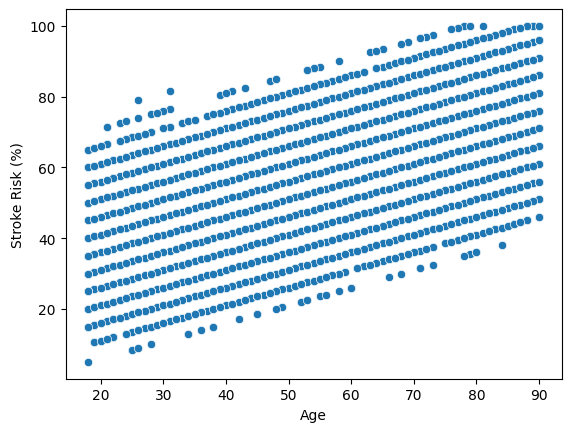

In [ ]:
#Scatterplot of Age and Stroke Risk
sns.scatterplot(data=df,x='Age',y='Stroke Risk (%)')
plt.show()

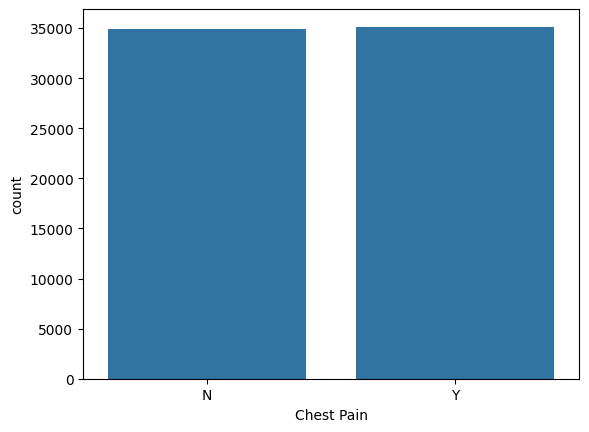

,count
Chest Pain,
Y,35131
N,34869


In [ ]:
#Count plot of Chest Pain
sns.countplot(data=df,x='Chest Pain')
plt.show()

#Value count of Chest Pain
df['Chest Pain'].value_counts()

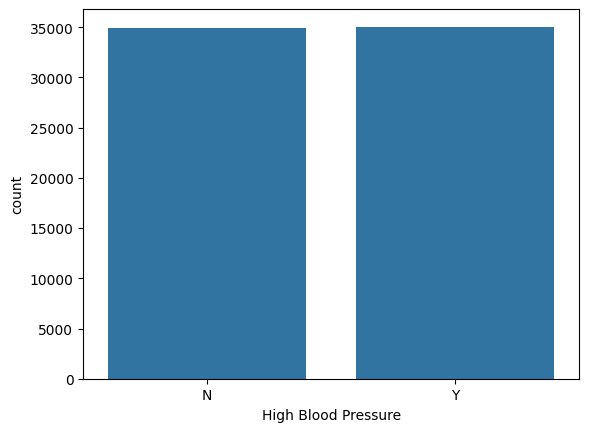

,count
High Blood Pressure,
Y,35045
N,34955


In [ ]:
#Count plot of High Blood Pressure
sns.countplot(data=df,x='High Blood Pressure')
plt.show()

#Value counts of high blood pressure
df['High Blood Pressure'].value_counts()

## Part 2: Methods

We are utilizing the Kaggle dataset, “Stroke Risk Prediction Dataset.” Our research question is as follows: Which health risk factors are most useful in predicting stroke risk? One observation in our study is one individual, specifically their age and risk factors. Examples of risk factors in the dataset include chest pain, shortness of breath, and irregular heart rate.


We are utilizing classification to model our research question. Our data is categorical, showing a “1” if the individual experiences a risk factor, and “0” if they do not. Classification is most appropriate when working with categorical data. As we are not predicting numerical values, regression analysis may not be appropriate. Furthermore, we will be utilizing supervised learning. In supervised learning, the model is able to predict outcomes for new data using predictions or classifications. As the labelled datasets have a known input and corresponding output (“0” or “1”), the model will ideally be able to predict unforeseen inputs. Therefore, this may be better suited for categorical data and a classification model.


In terms of our modelling approach, we will start by using a train-test model to accurately predict stroke risk. We will incorporate our own data to ensure accuracy. A logistic regression model will then be used to predict stroke probability based on the coefficient values, where larger, positive values are indicative of a higher risk for stroke. We will contrast this model with a gradient boosting model (GBM). This model builds sequential decision trees, where each tree corrects the errors of the previous one. The GBM ranks risk factors based on their importance of predicting stroke,  providing probability scores for stroke risk, which will help us identify key contributors.


To measure the success of our approach, we will assess outcomes of our prediction model with a confusion matrix, and look at the accuracy rate of the predictions. When assessing the confusion matrix, we will know that our predictions have been successful if our model can accurately predict true positives and true negatives for a high percentage of individuals. Furthermore, we can utilize a F1- score to evaluate the accuracy of the classification. This utilizes the number of false positives and false negatives to create a score. A score of “1” shows perfect precision, while a “0” shows poor precision. A higher score will show that our model correctly minimizes the number of false positives and false negatives.


While we are very confident in our dataset and the ability to analyze it, there are a couple of weaknesses that have stood out to us. First, there are a large number of variables in our dataset. Even though at times a larger number of variables does appear to provide clarity, as there are more metrics to analyze, it can also be counterproductive when there are too many observations to comb through. Furthermore, this leads into the second weakness that goes along with too many variables: correlation. Specifically looking at the variables in this dataset that impact stroke risk, a lot of them can correlate with each other. For example, anxiety and irregular heartbeat and shortness of breath are typically correlated, and together could have an exponential impact on stroke risk. This correlation and covariance between variables will need to be addressed. If the approach fails, from this unfortunate outcome we may learn that our model or strategy is not properly suited for the dataset. We may move forward utilizing a different modeling approach.


Significant preparation isn’t necessitated for the data as it is already aggregated and collated in the data repository we’ve appropriated for this project. However, if we were to extend the scope of our data usage, it would be necessary to converge the disparate data streams, and likely would require us to Extract, Transform, Load (ETL) to ensure legibility and searchability. Currently, our chief concern is one-hot encoding the categorical variable responses currently maintained in the dataset into binary variables (0,1). PCA could be utilized when analyzing the dataset to understand the covariance and correlation between variables, considering the high volume of variables in this dataset that could have high covariance. Detecting the correlation and covariance between variables may then help us simplify our dataset, facilitating better data integrity.

In terms of communicating our results, we will present: 1) a table of regression coefficients, 2) a gradient boosting model, and 3) a confusion matrix. Our table of regression coefficients will show which risk factors are more strongly correlated with stroke risk. If p<0.05, the variable is statistically significant. Next, our gradient boosting model will give us probability scores for each risk factor, where a higher probability score is more indicative of stroke risk. Lastly, we will use a confusion matrix to analyze the accuracy of the predictions, identifying the number of false positives and negatives.

## Part 3: Project Results

### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

X = df.drop(columns=["Stroke Risk (%)", "At Risk (Binary)"])
Y = df["At Risk (Binary)"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAccuracy Score:", accuracy)


Confusion Matrix:
 [[4892    0]
 [   0 9108]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4892
           1       1.00      1.00      1.00      9108

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000


Accuracy Score: 1.0


### Gradient Boosting Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

X = df.drop(columns=["Stroke Risk (%)", "At Risk (Binary)"])
y = df["At Risk (Binary)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAccuracy Score:", accuracy)

importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(importances)



Confusion Matrix:
 [[4483  409]
 [ 183 8925]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      4892
           1       0.96      0.98      0.97      9108

    accuracy                           0.96     14000
   macro avg       0.96      0.95      0.95     14000
weighted avg       0.96      0.96      0.96     14000


Accuracy Score: 0.9577142857142857
                           Feature  Importance
15                             Age    0.610267
14         Anxiety/Feeling of Doom    0.029289
9                  Nausea/Vomiting    0.027703
12                 Cold Hands/Feet    0.027550
7               Excessive Sweating    0.027148
8                 Persistent Cough    0.026983
4                        Dizziness    0.026974
3               Fatigue & Weakness    0.026885
13             Snoring/Sleep Apnea    0.026718
0                       Chest Pain    0.025580
1              Shortness of Breath    0.025346
2 

### Results and Conclusion

#### **Introduction**

#### **Logistic Regression Model (and why it didn’t work)**

#### **Gradient Boosting Model**

#### **Implications of Results**

#### **Concerns (concerns about our data, some outputs)**

#### **Looking Forward / Next Steps**